**<div align="center"><p>CEV & BEBKA - VERİ BİLİMCİ YETİŞTİRME PROGRAMI 2</p> </div>**
**<div align="center"><p>CAPSTONE PROJECT</p> </div>**
**<div align="center"><p>Face Tracking of Drivers Using YOLOv5 and Estimating Probability of Car Crash by Training Emotion, Age and Eye Condition Models</p> </div>**
**<div align="center"><p>Muhammed Erkam KÜÇÜKÇIRAK</p> </div>**



<h1>1. ABSTRACT</h1><p>Nowadays, the number of traffic accidents is quite high.
Most of them depends on drivers attention. Emotions, age and drowsiness might cause a car accident.  In this project, a solution was applied using cameras where had been placed inside the cars. The method of detecting drowsiness might prevent accidents. In order to achieve this, YOLOv5 and CNN models was used. Even though it is hard to work with facial datasets, the models had high accuracy values  </p>



<h1>2. RELATED WORKS</h1>
<p>Danisman et al. [1] started with the detection of the face using the Viola Jones [2] face detector available in the OpenCV library. Then, they used the neural network-based eye detector [3] available in the STASM [4] library to locate the positions of the pupils. The STASM is a variation of the Active Shape Model of Coote's implementation [5]. They derived only the Rowley's eye detection code for real-time speed constraints from the STASM library which is a group of neural networks that provides eye positions.</p>
<p> Yang et al. [6] declated the size of input image as 416∗416. After a series of convolution and batch normalization operations on the input image, the input image is sampled three times, 32 times, 16 times and 8 times, and the multi-scale feature map is obtained. After 32 times down sampling, the feature map is too small, therefore YOLO V3 uses the up sampling with step size of2 to double the size of the resulting feature map, which becomes 16 times of down sampling. Similarly, the feature map sampled on 16 times is sampled with a step length of2, and the feature map with a sampling size of 8 times is obtained, so that deep feature can be used for detection.</p>


<h1> 3. DATASETS </h1>
<h2> 3.1. Crash Dataset</h2>
<p> A crash dataset [7] was used in order to analyze the effect of age on accidents.</p>

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,9,10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


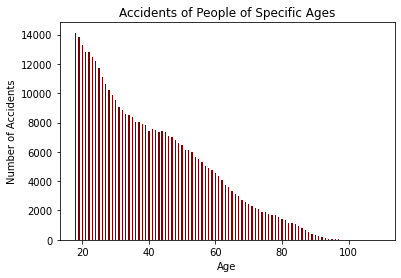

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("/content/PERSON.csv")
df = data.AGE.value_counts()
df = df.to_frame().reset_index()
df.rename(columns={"index": "Age", "AGE": "Frequency"}, inplace = True)
df = df[df['Age'] >= 18]
df = df.sort_values('Age')
abc = data.AGE.value_counts('Age')
plt.bar(df['Age'], df['Frequency'], color ='maroon',width = 0.4) 
plt.xlabel("Age")
plt.ylabel("Number of Accidents")
plt.title("Accidents of People of Specific Ages")
plt.show()

<h2>3.2. Age Dataset</h2>
<p> UTKFace dataset [8] was used in order to extract features and specify driver's age. UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity.</p>

<h2>3.3. Eye Dataset</h2> <p>Closed Eyes In The Wild (CEW) dataset [9] was used in order to detect if driver's eyes are open or close.</p>



<h2>3.4. Emotion Dataset</h2>
<p>FER-2013 Dataset [10] was used in order to detect driver's emotion. </p>

<h2>3.5. Human Dataset</h2>
<p>CrowdHuman dataset [11] was used in order to detect faces from images using YOLOv5.</p>

<h1>4. USED METHODOLOGY</h2>
<p>This project includes 3 CNN models and 1 YOLOv5 model. To classify age, eye and emotion; VGG19 (by Transfer Learning), Custom CNN model and VGG16 (by Transfer Learning) was used to train CNN models respectively. </p>

<p>This code uploads the weights of trained VGG19 Transfer Learning model on the age dataset. It will be used in order to classify age of drivers.</p>

In [ ]:
"""
Load the weights of age classification model.

"""
from tensorflow.keras.models import model_from_json

json_file = open(r"/content/age_modelvgg19.json", 'r')
loaded_model_json1 = json_file.read()
json_file.close()
age_model = model_from_json(loaded_model_json1)
# load weights into new model
age_model.load_weights(r"/content/age_modelvgg19.h5")
age_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


<p>This code uploads the weights of trained VGG16 Transfer Learning model on the eye dataset. It will be used in order to classify driver's eye status (open or close).</p>


In [ ]:
"""
Load the weights of eye classification model.
"""
json_file = open(r"/content/eye_model.json", 'r')
loaded_model_json2 = json_file.read()
json_file.close()
eye_VGG16_tl = model_from_json(loaded_model_json2)

# load weights into new model
eye_VGG16_tl.load_weights(r"/content/eye_model.h5")
eye_VGG16_tl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<p>This code uploads the weights of trained custom CNN model on the emotion dataset. It will be used in order to classify driver's eye status (open or close).</p>

In [ ]:
"""
Load the weights of emotion classification model.
"""
from tensorflow.keras.models import model_from_json

json_file = open(r"/content/model_emotion.json", 'r')
loaded_model_json3 = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json3)
# load weights into new model
emotion_model.load_weights(r"/content/model_emotion.h5")
emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h1>5. FINAL PRODUCT DEMO</h1>
<p>There is an original video and an annotated demo video if you do not prefer to run this .ipynb file. If you want to run this notebook on your computer, please change the file path areas for your own computer. If you want to run this file on Google Colab, just upload the all files. This code will generate the annotated video automatically. When it's done, the only thing that needed to be done is downloading the output video on your computer. </p>

<p>This codes process the cropped image (human head) by YOLOv5 model for CNN models to predict that which class shall that image to be in.</p>

In [ ]:
import cv2
import numpy as np
import torch

def pre_procces_for_eye(frame):
    image = cv2.resize(frame, (150,150)) 
    image = np.array(image).reshape(-1,150,150,3)
    image = image.astype("float32")
    image/= 255.0
    return image

In [ ]:
def pre_procces_for_age(frame):
    image = cv2.resize(frame, (180,180))
    image = np.array(image).reshape(-1,180,180,3)
    image = image.astype("float32")
    image/= 255.0
    return image

In [ ]:
def pre_procces_for_emotion(frame):
    image = cv2.resize(frame, (48,48))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = np.array(image).reshape(-1,48,48,1)
    image = image.astype("float32")
    image/= 255.0
    return image

<p>By this codes, all the trained models are going to work simultaneously. This code is going to obtain ROI (Region Of Interest) of the image and crop it. The cropped image's going to be classified by 3 CNN models. After that, results going to be combined on accident probability. If you want to test the model by the videos that you want to, set the file path for it's own path.</p>

In [ ]:
PATH = r"/content/best3.pt"
model_face_yolo = torch.hub.load('ultralytics/yolov5', 'custom', PATH)
cap = cv2.VideoCapture(r"/content/original.mp4")
eye_dictionary = {0:"Open", 1:"Close"}
age_dictionary = {0:["18-24",0.3], 1: ["25-45",0.2], 2: ["45+",0.1]}
emotion_dictionary = {0: ["Negative",0.3], 1:["Positive",0.2]}

width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer= cv2.VideoWriter(r"/content/annotated_demo_by_exec.mp4", cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))

i=0
temp_li=[]
FPS= int(cap.get(cv2.CAP_PROP_FPS))
drowsy_queue = []
sleeping_queue = []

In [ ]:
while(True):
    ret, frame = cap.read() 
    if ret == False: break

    face_result = model_face_yolo(frame)
    try:
        boxes = face_result.xyxy[0].numpy()
        people_x2y2 = np.sum(boxes[:,2:4], axis=1)
        index_of_driver = np.argmax(people_x2y2)
        x0, y0, x1, y1, _, _ = boxes[index_of_driver].astype(int) 
    except:
        pass
    else:
        cropped_img_yolo = frame[y0:y1, x0:x1]
        img_age = pre_procces_for_age(cropped_img_yolo)
        img_eye = pre_procces_for_eye(cropped_img_yolo)
        img_emotion = pre_procces_for_emotion(cropped_img_yolo)


        predicted_index_eye = np.argmax(eye_VGG16_tl.predict(img_eye))
        predicted_index_age = np.argmax(age_model.predict(img_age))
        predicted_emotion = emotion_model.predict(img_emotion)
        predicted_index_emotion = np.argmax(predicted_emotion)
        predicted_emotion_max = np.max(predicted_emotion)  
        
        crash_prob= 0.0
        crash_prob += age_dictionary[predicted_index_age][1]
        
        if len(sleeping_queue)>= FPS*7:
            sleeping_queue.pop(0)
        
        if len(drowsy_queue)>= FPS*5:
            drowsy_queue.pop(0)
        
        sleeping_queue.append(eye_dictionary[predicted_index_eye])
        drowsy_queue.append(eye_dictionary[predicted_index_eye]) 
        
        
        if len(drowsy_queue) >= FPS*3:
            if drowsy_queue.count("Open") < drowsy_queue.count("Close") * 4:
                cv2.putText(frame, "Drowsy   : True", (25, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 2)
                crash_prob += 0.3
            else:
                cv2.putText(frame, "Drowsy   : False", (25, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 2)
                
        if len(sleeping_queue) == (FPS*5):
            if drowsy_queue.count("Open") < drowsy_queue.count("Close") * 5:
                crash_prob = 1.0


    
        driver_x = int(x0 + ((x1-x0)/2))-50

        cv2.putText(frame, "DRIVER", (driver_x, y1-15), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 3)
        cv2.putText(frame, f'Eyes          : {eye_dictionary[predicted_index_eye]}', (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 2)
        cv2.putText(frame, f'Age Pred.     : {age_dictionary[predicted_index_age][0]}', (25, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 2)

        if predicted_emotion_max >= 0.8:
            cv2.putText(frame, f'Emotion Pred. : {emotion_dictionary[predicted_index_emotion][0]}', (25, 95), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 2)
            crash_prob += emotion_dictionary[predicted_index_emotion][1]
        else:
           cv2.putText(frame, "Emotion Pred. : Neutral", (25, 95), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 2)

        cv2.putText(frame, f'Crash Prob.     : {crash_prob:.2f}', (25, 165), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255),thickness = 2)

        start_point = (x0, y0)
        end_point = (x1, y1)
        cv2.rectangle(frame, start_point, end_point, (0,255,0), 2)
        writer.write(frame)
        
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break
  
# Close the window / Release webcam
cap.release()
writer.release()
# De-allocate any associated memory usage 
cv2.destroyAllWindows()


<p>Download the output video to watch it.</p>

<h1>REFERENCES</h1>
<p>[1] T. Danisman, I. M. Bilasco, C. Djeraba and N. Ihaddadene, "Drowsy driver detection system using eye blink patterns," 2010 International Conference on Machine and Web Intelligence, 2010, pp. 230-233, doi: 10.1109/ICMWI.2010.5648121.</p>
<p> [2] P. Viola and M. Jones, "Rapid object detection using a boosted cascade of simple features," International Conference on Computer Vision and Pattern Recognition, CVPR 2001 </p>
<p> [3] H.A. Rowley, S. Baluja and T. Kanade, "Neural Network-Based Face Detection," IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 20, pp. 23-38, http://vasc.ri.cmu.edu/NNFaceDetector, 1998. </p>
<p> [4] S. Milborrow and F. Nicolls, "Locating facial features with an extended active shape model," In D. Forsyth, P. Torr and A. Zisserman (eds.) ECCV 2008, Part IV. LNCS, vol. 5305, 504-513. Springer-Verlag, Heidelberg, 2008.</p>
<p> [5] 21. T.F. Cootes, G.J. Edwards and C.J. Taylor, "Active appearance models," In H. Burkhardt and B. Neumann, editors, 5th European Conference on Computer Vision, vol. 2, 484-498. Springer, Berlin, 1998.</p>
<p> [6] W. Yang and Z. Jiachun, "Real-time face detection based on YOLO," 2018 1st IEEE International Conference on Knowledge Innovation and Invention (ICKII), 2018, pp. 221-224, doi: 10.1109/ICKII.2018.8569109. </p>
<p> [7] https://discover.data.vic.gov.au/dataset/crash-stats-data-extract</p>
<p> [8] https://susanqq.github.io/UTKFace/</p>
<p> [9] http://parnec.nuaa.edu.cn/_upload/tpl/02/db/731/template731/pages/xtan/ClosedEyeDatabases.html</p>
<p> [10] https://www.kaggle.com/datasets/msambare/fer2013</p>
<p> [11] https://www.crowdhuman.org/ </p>





